<a href="https://colab.research.google.com/github/sau-rabh999/Deep-Learning/blob/main/RNN_implementation_for_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing all libraries

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Importing the dataset

In [ ]:
df = pd.read_csv('Tweets.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.shape

(14640, 15)

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,568458999798108160,negative,1.0000,Can't Tell,1.0000,United,NaN,sherrirosen,NaN,0,@united I must stop my relationship with you. ...,"[0.0, 0.0]",2015-02-19 09:16:01 -0800,New York City,Eastern Time (US & Canada)
1,569275554110664705,negative,0.6667,Late Flight,0.3333,Delta,NaN,Evecotto,NaN,0,@JetBlue no more than half an hour wait. It's ...,NaN,2015-02-21 15:20:43 -0800,NaN,NaN
2,569935951868207104,neutral,1.0000,NaN,NaN,Delta,NaN,uKnowMySteez,NaN,1,😐 “@JetBlue: Our fleet's on fleek. http://t.co...,NaN,2015-02-23 11:04:54 -0800,MPLS,Central Time (US & Canada)
3,569316417226600448,negative,1.0000,Late Flight,0.6427,United,NaN,tarlonious,NaN,0,@united and waiting,NaN,2015-02-21 18:03:05 -0800,NaN,NaN
4,568725291247525888,negative,1.0000,Can't Tell,0.6744,US Airways,NaN,RVangutenberg,NaN,0,@USAirways NEVER AGAIN! Worse experience in my...,NaN,2015-02-20 02:54:10 -0800,Puerto Rico,NaN


Taking only the relevant columns into consideration

In [ ]:
df = df[['airline_sentiment','text']]
df.head()

,airline_sentiment,text
0,negative,@united I must stop my relationship with you. ...
1,negative,@JetBlue no more than half an hour wait. It's ...
2,neutral,😐 “@JetBlue: Our fleet's on fleek. http://t.co...
3,negative,@united and waiting
4,negative,@USAirways NEVER AGAIN! Worse experience in my...


Data exploration

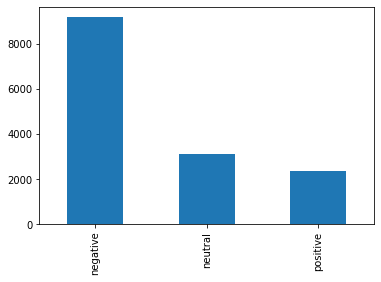

In [ ]:
df['airline_sentiment'].value_counts().sort_index().plot.bar()

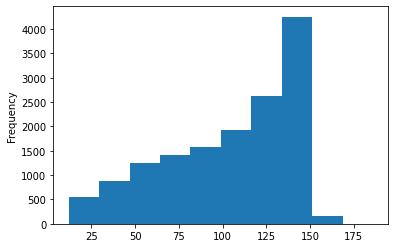

In [ ]:
df['text'].str.len().plot.hist()

**Preprocessing**

In [ ]:
df['text'] = df['text'].str.replace('@VirginAmerica','')
df.head()

,airline_sentiment,text
0,negative,@united I must stop my relationship with you. ...
1,negative,@JetBlue no more than half an hour wait. It's ...
2,neutral,😐 “@JetBlue: Our fleet's on fleek. http://t.co...
3,negative,@united and waiting
4,negative,@USAirways NEVER AGAIN! Worse experience in my...


In [ ]:
df['text'].apply(lambda x : x.lower())
df['text'] = df['text'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]', '', x))
df['text'].head()

0    united I must stop my relationship with you Yo...
1    JetBlue no more than half an hour wait Its unr...
2        JetBlue Our fleets on fleek httptcoQavvlAXLkl
3                                   united and waiting
4    USAirways NEVER AGAIN Worse experience in my l...
Name: text, dtype: object

In [ ]:
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(df['text'].values)

x = tokenizer.texts_to_sequences(df['text'].values)
x = pad_sequences(x)
x[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    5,    3,  774,  395,   11, 2718,   25,    6,
         535, 1369, 3665,   10,   10,   53,  213, 2223, 2718,   14,   99],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   17,   28,   98,  156,  463,   40,   90,  121,   64, 1593,
         288,  149,   87,  468,   52, 1508,  435,    1,  170,    9,   29],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,   17,   53,  259,    9,  247],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    5,   10,  106],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   

**Building the model**

In [ ]:
model = Sequential()
model.add(Embedding(5000,256,input_length=x.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256,dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 33, 256)           1280000   
_________________________________________________________________
dropout (Dropout)            (None, 33, 256)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 33, 256)           525312    
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense (Dense)                (None, 3)                 771       
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


Transforming sentiment column to OneHot encoding

In [ ]:
y = pd.get_dummies(df['airline_sentiment']).values
[print(df['airline_sentiment'][i], y[i]) for i in range(0,5)]

negative [1 0 0]
negative [1 0 0]
neutral [0 1 0]
negative [1 0 0]
negative [1 0 0]


[None, None, None, None, None]

Splitting dataset into training and test set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

**Training model**

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
366/366 - 210s - loss: 0.4064 - accuracy: 0.8424
Epoch 2/10
366/366 - 211s - loss: 0.3302 - accuracy: 0.8747
Epoch 3/10
366/366 - 211s - loss: 0.2710 - accuracy: 0.8986
Epoch 4/10
366/366 - 212s - loss: 0.2263 - accuracy: 0.9178
Epoch 5/10
366/366 - 212s - loss: 0.1864 - accuracy: 0.9303
Epoch 6/10
366/366 - 211s - loss: 0.1628 - accuracy: 0.9398
Epoch 7/10
366/366 - 211s - loss: 0.1368 - accuracy: 0.9514
Epoch 8/10
366/366 - 211s - loss: 0.1191 - accuracy: 0.9571
Epoch 9/10
366/366 - 212s - loss: 0.1134 - accuracy: 0.9588
Epoch 10/10
366/366 - 212s - loss: 0.0935 - accuracy: 0.9670


In [ ]:
model.save('sentiment_analysis_rnn_lstm')

INFO:tensorflow:Assets written to: sentiment_analysis_rnn_lstm/assets


**Training model**

In [ ]:
y_pred = model.predict(x_test)
[print(df['text'][i], y_pred[i], y_test[i]) for i in range(0,5)]

united I must stop my relationship with you Youve become greedy and heartless and our long term relationship is over [0.00484226 0.97494113 0.02021661] [0 1 0]
JetBlue no more than half an hour wait Its unreal Finally first bag coming out SJU needs to work on this [9.9992144e-01 6.8679685e-05 9.9239305e-06] [0 1 0]
 JetBlue Our fleets on fleek httptcoQavvlAXLkl [9.942245e-04 1.831369e-03 9.971744e-01] [0 0 1]
united and waiting [6.2934594e-04 3.1162330e-03 9.9625444e-01] [0 0 1]
USAirways NEVER AGAIN Worse experience in my life httptco3dDQq0gQni [9.99981403e-01 1.38980895e-05 4.60594083e-06] [1 0 0]


[None, None, None, None, None]

Comparing real data and predictions

In [ ]:
pos_count, neu_count, neg_count = 0, 0, 0
real_pos, real_neu, real_neg = 0, 0, 0
for i, y_pred in enumerate(y_pred):
  if np.argmax(y_pred)==2:
    pos_count+=1
  elif np.argmax(y_pred)==1:
    neu_count+=1
  else:
    neg_count+=1

  if np.argmax(y_test[i])==2:
    real_pos+=1
  elif np.argmax(y_test[i])==1:
    real_neu+=1
  else:
    real_neg+=1

print('Positive predictions: ',pos_count)
print('Neutral predictions: ',neu_count)
print('Negative predictions: ',neg_count)
print('Real positive: ',real_pos)    
print('Real neutral: ',real_neu) 
print('Real negative: ',real_neg) 


Positive predictions:  421
Neutral predictions:  620
Negative predictions:  1887
Real positive:  491
Real neutral:  616
Real negative:  1821
